<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [88]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

#### Load the Life expectancy dataset and display the first five records 

In [89]:
# load the csv file

# type your code here
df = pd.read_csv('Life_Expectancy.csv')
# display the first five observations
df.head()
# type your code here

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [90]:
# check the size of the dataframe
df.shape
# type your code here

(182, 20)

In [91]:
# display dataset information understand the dataset
df.info()
# type your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# type your code here
df.Life_Expectancy.isnull().sum()

9

In [93]:
#since life expectancy is the target variable we cannot impute it with any value
df.dropna(subset = ['Life_Expectancy'],how = 'all',inplace = True,axis = 0)
df.Life_Expectancy.isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
# type your code here
df.isnull().sum()/len(df)*100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       0.000000
Infant_Deaths         0.000000
Alcohol              95.953757
Hepatitis B           5.202312
Measles               0.000000
BMI                   1.156069
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  12.138728
Population           19.653179
Malnourished10_19     1.156069
Malnourished5_9       1.156069
Income_Index          4.046243
Schooling             4.046243
Life_Expectancy       0.000000
dtype: float64

In [95]:
df = df.drop(labels = "Alcohol",axis = 1)
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

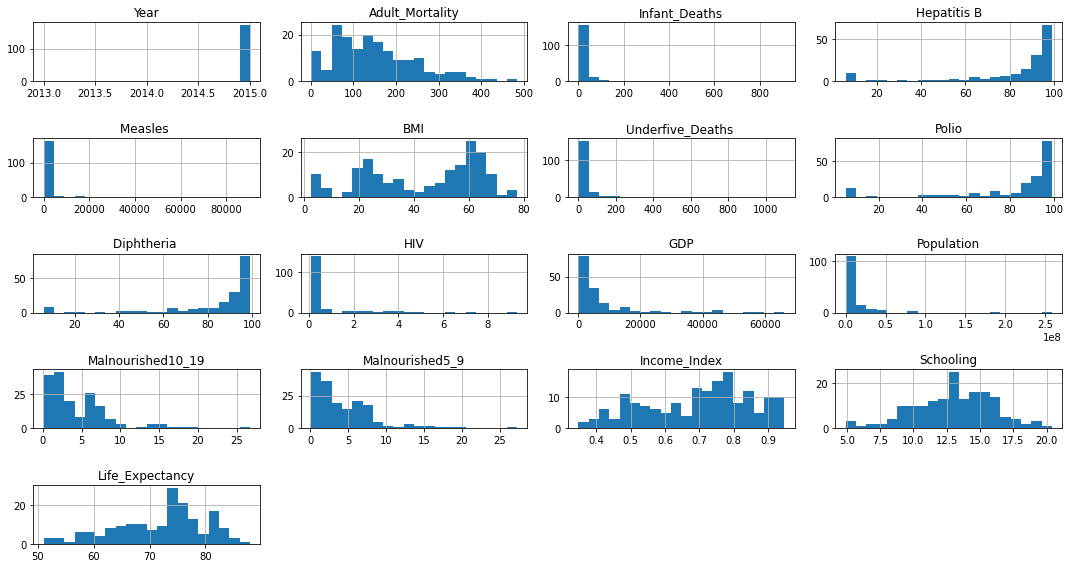

In [96]:
df.hist(bins = 20,figsize = (15,8))
plt.tight_layout()

In [97]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Malnourished5_9'] = df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())
df['Malnourished10_19'] = df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())

In [98]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Income_Index'] = df['Income_Index'].fillna(df['Income_Index'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [99]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
df.describe(include = 'object')

,Country,Status
count,173,173
unique,173,2
top,Nepal,Developing
freq,1,141


In [101]:
df.describe(include = np.number)

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9.663690e+06,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,2.650522e+07,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,5.874820e+05,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343999,2.174645e+06,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7.177991e+06,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


In [102]:
df.set_index(['Country'],inplace = True)
df.head()

,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
Country,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
Albania,2015,Developing,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
Algeria,2015,Developing,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
Angola,2015,Developing,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
Antigua,2015,Developing,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


In [103]:
df.set_index(['Year'],inplace = True)

In [104]:
df.drop('Infant_Deaths',axis = 1,inplace = True)

In [105]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
# type your code here
df['Status'] = pd.get_dummies(data = df['Status'],drop_first=True)

<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
df.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

In [108]:
# type your code here
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = df.drop('Life_Expectancy',axis = 1)
x = sm.add_constant(x)
y = df.Life_Expectancy
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 1,test_size = 0.2)
MLR_model = sm.OLS(ytrain,xtrain).fit()

In [109]:
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     54.83
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           7.90e-47
Time:                        09:29:34   Log-Likelihood:                -339.72
No. Observations:                 138   AIC:                             711.4
Df Residuals:                     122   BIC:                             758.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.7834      2.852     18.508      0.000      47.138      58.429
Status               -1.1090      0.852     -1.302      0.195      -2.795       0.577
Adult_Mortality      -0.0236      0.004     -5.383      0.000      -0.032      -0.015
Hepatitis B           0.0577      0.034      1.707      0.090      -0.009       0.125
Measles            2.848e-05   5.47e-05      0.520      0.604   -7.99e-05       0.000
BMI                  -0.0140      0.017     -0.846      0.399      -0.047       0.019
Underfive_Deaths     -0.0024      0.005     -0.505      0.614      -0.012       0.007
Polio                 0.0121      0.016      0.779      0.438      -0.019       0.043
Diphtheria           -0.0119      0.036     -0.325      0.745      -0.084       0.060
HIV                  -0.6763      0.262     -2.580      0.011      -1.195      -0.157
GDP               -1.209e-06   2.93e-05     -0.041      0.967   -5.91e-05    5.67e-05
Population        -4.461e-09   1.06e-08     -0.422      0.674   -2.54e-08    1.64e-08
Malnourished10_19    -0.1450      0.257     -0.565      0.573      -0.653       0.363
Malnourished5_9       0.0360      0.253      0.143      0.887      -0.464       0.536
Income_Index         29.1717      5.180      5.632      0.000      18.918      39.425
Schooling             0.0184      0.234      0.079      0.937      -0.445       0.482
==============================================================================
Omnibus:                        8.293   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               13.932
Skew:                          -0.219   Prob(JB):                     0.000943
Kurtosis:                       4.493   Cond. No.                     6.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# since durbin waston test value is >2 thus the residuals does not have equal variance

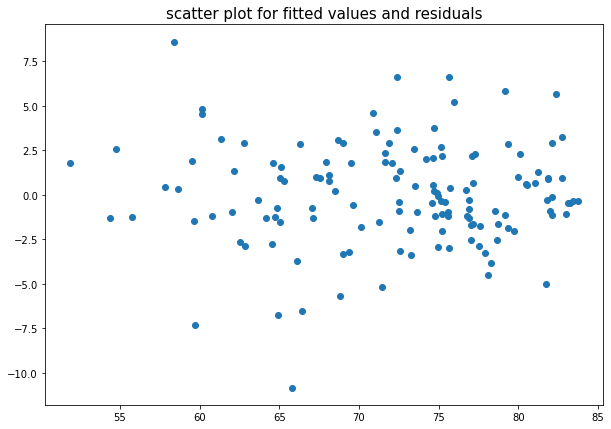

In [111]:
ypred = MLR_model.fittedvalues
res = MLR_model.resid
plt.figure(figsize = (10,7))
plt.scatter(x = ypred,y = res)
plt.title('scatter plot for fitted values and residuals',fontsize = 15)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
# type your code here
df.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

In [113]:
x = df.iloc[:,[2,6,7]]
y = df['Life_Expectancy']
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 10,test_size = 0.2)
model = sm.OLS(ytrain,xtrain).fit()

In [114]:
ypred = model.predict(xtest)
SSE = np.sum((ytest - ypred)**2)
SSE

1248.758274755534

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# type your code here
x = df.iloc[:,[11,12]]
y = df['Life_Expectancy']
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 10,test_size = 0.3)
model1 = sm.OLS(ytrain,xtrain).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     21.65
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.71e-11
Time:                        09:29:35   Log-Likelihood:                -456.40
No. Observations:                 138   AIC:                             920.8
Df Residuals:                     134   BIC:                             932.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.7379      2.442     22.004      0.000      48.908      58.568
Hepatitis B    -0.0522      0.053     -0.983      0.327      -0.157       0.053
Polio           0.1106      0.030      3.693      0.000       0.051       0.170
Diphtheria      0.1574      0.063      2.509      0.013       0.033       0.281
==============================================================================
Omnibus:                        5.065   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.099
Skew:                          -0.467   Prob(JB):                       0.0781
Kurtosis:                       2.880   Cond. No.                         641.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
# type your code here
x = df.Adult_Mortality
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
lr = LinearRegression()
model1 = lr.fit(xtrain,ytrain)
lrypred = model1.predict(xtest)

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)

sgd = SGDRegressor()
model2 = sgd.fit(xtrain,ytrain)
sgdypred = model2.predict(xtest)

In [131]:
xtrain.shape,ytrain.shape

((121, 2), (121,))

ValueError: x and y must be the same size

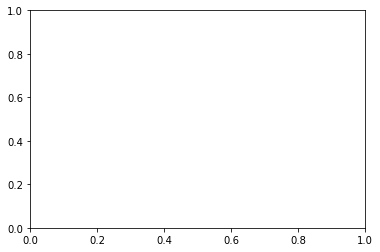

In [134]:
plt.scatter(xtrain,ytrain,color = 'grey')
plt.plot(xtrain,sgdypred,color = 'red',label = 'SGD regressor')
plt.plot(xtrain,lrypred,color = 'blue',label = 'LR regressor')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# type your code here
x = df.iloc[:,[2,6,7]]
y = df.Life_Expectancy
#x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
#from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
lr = LinearRegression()
model1 = lr.fit(xtrain,ytrain)
lrypred = model1.predict(xtest)

In [148]:
sgd = SGDRegressor(random_state = 1)
model2 = sgd.fit(xtrain,ytrain)
sgdypred = model2.predict(xtest)

In [149]:
model1.coef_

array([-0.02860623,  0.12218467,  0.12136721])

In [150]:
model2.coef_

array([-3.63370445e+10, -4.19287351e+10, -1.06631918e+10])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
# type your code here
x = df.drop('Life_Expectancy',axis = 1)
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
#from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
model1 = sm.OLS(ytrain,xtrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     48.84
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.43e-40
Time:                        09:56:56   Log-Likelihood:                -298.23
No. Observations:                 121   AIC:                             628.5
Df Residuals:                     105   BIC:                             673.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.4293      2.809     18.667      0.000      46.860      57.998
Status               -0.6353      0.950     -0.669      0.505      -2.519       1.248
Adult_Mortality      -0.0235      0.004     -5.689      0.000      -0.032      -0.015
Hepatitis B           0.0684      0.034      2.001      0.048       0.001       0.136
Measles            3.632e-06   5.04e-05      0.072      0.943   -9.63e-05       0.000
BMI                  -0.0046      0.018     -0.246      0.806      -0.041       0.032
Underfive_Deaths      0.0006      0.005      0.134      0.894      -0.009       0.010
Polio                 0.0147      0.015      0.963      0.338      -0.016       0.045
Diphtheria           -0.0233      0.037     -0.633      0.528      -0.096       0.050
HIV                  -0.4564      0.258     -1.766      0.080      -0.969       0.056
GDP               -1.454e-05   4.32e-05     -0.336      0.737      -0.000    7.12e-05
Population        -6.373e-09   1.11e-08     -0.573      0.568   -2.84e-08    1.57e-08
Malnourished10_19    -0.2316      0.265     -0.873      0.384      -0.758       0.294
Malnourished5_9       0.0657      0.259      0.253      0.801      -0.449       0.580
Income_Index         32.0118      6.396      5.005      0.000      19.329      44.695
Schooling            -0.1868      0.305     -0.612      0.542      -0.792       0.419
==============================================================================
Omnibus:                        9.031   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.938
Skew:                          -0.365   Prob(JB):                      0.00155
Kurtosis:                       4.426   Cond. No.                     7.41e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
model2 = sm.OLS(ytest,xtest).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     24.06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.49e-14
Time:                        09:57:39   Log-Likelihood:                -117.87
No. Observations:                  52   AIC:                             267.7
Df Residuals:                      36   BIC:                             299.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.8383      6.511      8.883      0.000      44.632      71.044
Status               -1.4670      1.189     -1.233      0.225      -3.879       0.945
Adult_Mortality      -0.0352      0.010     -3.465      0.001      -0.056      -0.015
Hepatitis B           0.0170      0.038      0.450      0.655      -0.059       0.093
Measles               0.0015      0.002      0.889      0.380      -0.002       0.005
BMI                  -0.0042      0.027     -0.155      0.878      -0.059       0.050
Underfive_Deaths     -0.0258      0.031     -0.829      0.413      -0.089       0.037
Polio                 0.0132      0.043      0.305      0.762      -0.075       0.101
Diphtheria            0.0120      0.084      0.143      0.887      -0.158       0.182
HIV                  -0.4828      0.933     -0.517      0.608      -2.375       1.409
GDP               -2.981e-05   3.33e-05     -0.896      0.376   -9.73e-05    3.77e-05
Population        -3.835e-08   4.14e-08     -0.926      0.360   -1.22e-07    4.56e-08
Malnourished10_19    -0.1919      2.314     -0.083      0.934      -4.885       4.501
Malnourished5_9       0.1603      2.274      0.071      0.944      -4.451       4.771
Income_Index         24.3202      8.826      2.755      0.009       6.419      42.221
Schooling             0.1515      0.310      0.488      0.628      -0.478       0.781
==============================================================================
Omnibus:                        1.182   Durbin-Watson:                   2.574
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.661
Skew:                           0.264   Prob(JB):                        0.719
Kurtosis:                       3.164   Cond. No.                     4.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# the model underfits the data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

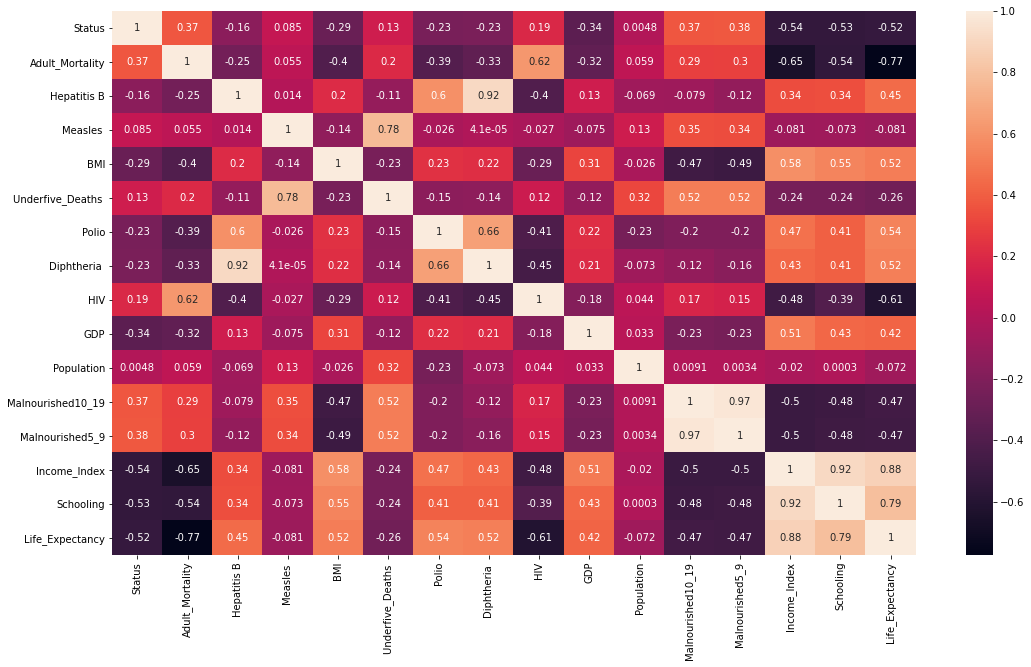

In [161]:
# type your code here
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(),annot = True,annot_kws = {'size':10})

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [165]:
# type your code here
from sklearn.metrics import  mean_squared_error
ridge = Ridge(alpha = 0.5)
ridge_model = ridge.fit(xtrain,ytrain)
train_pred = ridge_model.predict(xtrain)

mse_train = mean_squared_error(ytrain,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print('Root mean squared error (RMSE) on training set',rmse_train)


test_pred = ridge_model.predict(xtest)
mse_test = mean_squared_error(ytest,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print('Root mean squared error (RMSE) on test set',rmse_test)


Root mean squared error (RMSE) on training set 3.0011
Root mean squared error (RMSE) on test set 2.8637


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59984e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [166]:
# there is barely any difference in the rmses and thus ridge has generalized the model fairly even during presence of multicollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here
x = df.iloc[:,[3,8,2,6,7]]
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 10)


model1 = sm.OLS(ytrain,xtrain).fit()
train_pred = model1.predict(xtrain)

mse_train = mean_squared_error(ytrain,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print('Root mean squared error (RMSE) on training set',rmse_train)


test_pred = model1.predict(xtest)
mse_test = mean_squared_error(ytest,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print('Root mean squared error (RMSE) on test set',rmse_test)

Root mean squared error (RMSE) on training set 5.7034
Root mean squared error (RMSE) on test set 5.7282


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [170]:
# type your code here
x = df.iloc[:,[3,8,12,11]]
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 30)


model1 = sm.OLS(ytrain,xtrain).fit()
train_pred = model1.predict(xtrain)

mse_train = mean_squared_error(ytrain,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print('Root mean squared error (RMSE) on training set',rmse_train)


test_pred = model1.predict(xtest)
mse_test = mean_squared_error(ytest,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print('Root mean squared error (RMSE) on test set',rmse_test)

Root mean squared error (RMSE) on training set 5.5044
Root mean squared error (RMSE) on test set 6.3994


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
# type your code here
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
y = (y - y.mean())/y.std()

lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(xtrain,ytrain)
train_pred = model1.predict(xtrain)

mse_train = mean_squared_error(ytrain,train_pred)
rmse_train = round(np.sqrt(mse_train),4)
print('Root mean squared error (RMSE) on training set',rmse_train)


test_pred = lasso_model.predict(xtest)
mse_test = mean_squared_error(ytest,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print('Root mean squared error (RMSE) on test set',rmse_test)

Root mean squared error (RMSE) on training set 5.5044
Root mean squared error (RMSE) on test set 5.5802


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
# type your code here
from sklearn.model_selection import GridSearchCV
x = df.drop('Life_Expectancy',axis = 1)
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 30)
list_of_alpha ={'alpha': [7,8,9,10,11]}
ridge = Ridge()
grid = GridSearchCV(estimator = ridge,param_grid = list_of_alpha,cv = 3)
grid.fit(xtrain,ytrain)
print('best parameter',grid.best_params_)

best parameter {'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [179]:
# type your code here
x = df.drop('Life_Expectancy',axis = 1)
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 30)
list_of_alpha ={'alpha': [7,8,9,10,11]}
lasso = Lasso()
grid = GridSearchCV(estimator = lasso,param_grid = list_of_alpha,cv = 5)
grid.fit(xtrain,ytrain)
print('best parameter',grid.best_params_)

best parameter {'alpha': 7}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [183]:
# type your code here
x = df.drop('Life_Expectancy',axis = 1)
y = df.Life_Expectancy
x = sm.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 30)
list_of_alpha ={'alpha': [7,8,9,10,11]}
from sklearn.linear_model import ElasticNet
tuned_parameters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4] ,'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet,param_grid = tuned_parameters,cv = 10)
enet_grid.fit(xtrain,ytrain)
print('best parameter',enet_grid.best_params_)

best parameter {'alpha': 1.5, 'l1_ratio': 0.9}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

In [185]:
x = df.iloc[:,:15]
y = df.Life_Expectancy

ss = StandardScaler()
x = ss.fit_transform(x)
y = (y - y.mean())/y.std()

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 110)
#from sklearn.linear_model import ElasticNet
tuned_parameters = { 'l1_ratio' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
enet = ElasticNet(alpha = 0.8)
enet_grid = GridSearchCV(estimator = enet,param_grid = tuned_parameters,cv = 10)
enet_grid.fit(xtrain,ytrain)
print('best parameter',enet_grid.best_params_)

best parameter {'l1_ratio': 0.005}
